# Deep Reinforcement Learning aplicado en batallas Pokémon

Proyecto para curso IIC3675 - Aprendizaje Reforzado (2025-1)

Integrantes:
- Francisco Arenas (francis.arenasv@uc.cl)
- Benjamín Faúndez (benjamin.faundez@uc.cl)
- Camilo Romero (cromere@uc.cl)

## 1. Resultados en entrenamiento

Reward Over Time Comparison - ppo


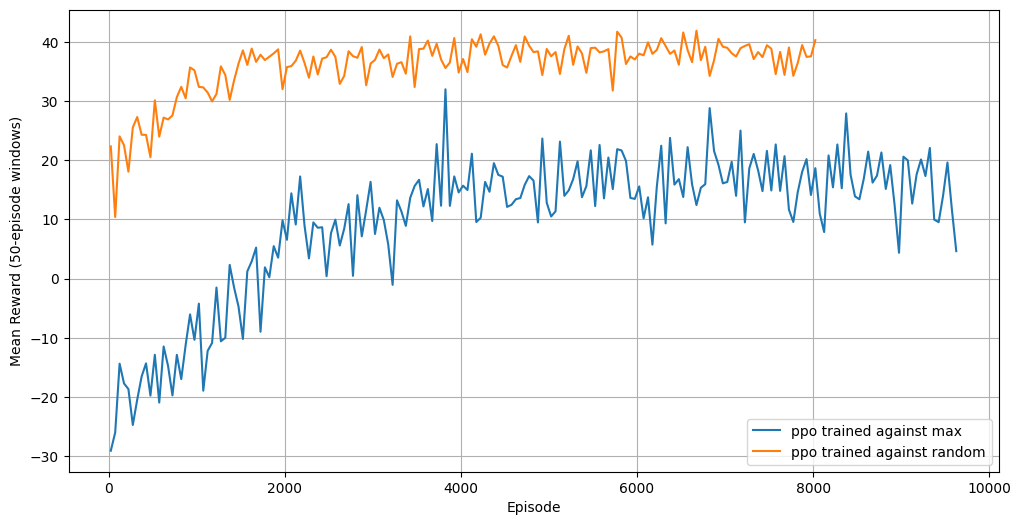

Reward Over Time Comparison - dqn


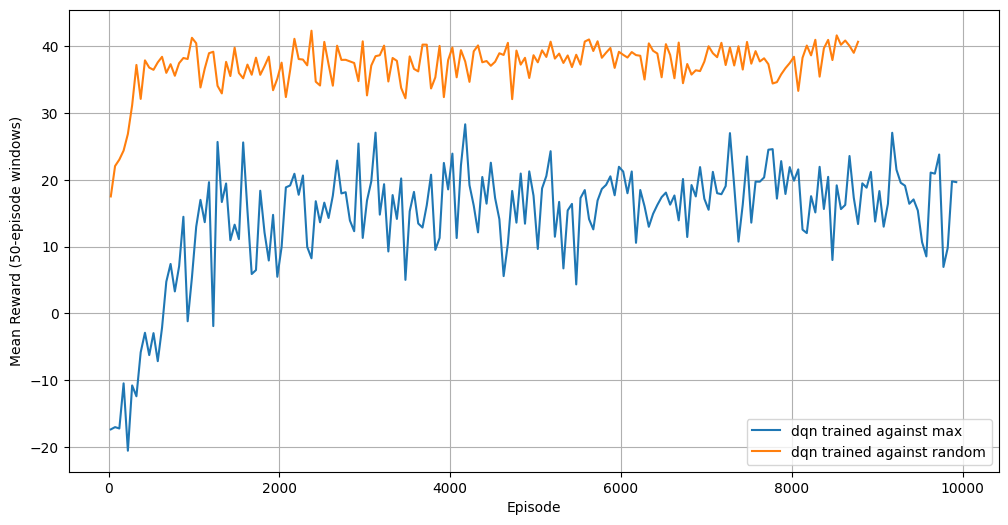

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar datos
train_dir = Path().parent / "outputs" / "train"
train_data = {}
if train_dir.exists():
    for model_dir in train_dir.iterdir():
        if model_dir.is_dir():
            # Cargar tipo de modelo
            model_type = model_dir.name
            train_data[model_type] = {}
            # Iterar sobre los archivos *_monitor.csv
            for monitor_file in model_dir.glob("*_monitor.csv"):
                model_name = monitor_file.stem.replace("_monitor", "")
                train_data[model_type][model_name] = {
                    "monitor_data": pd.read_csv(monitor_file, skiprows=1)
                }

# Plot monitor data
for model_type, models in train_data.items():
    print(f"Reward Over Time Comparison - {model_type}")
    plt.figure(figsize=(12, 6))
    for model_name, data in models.items():
        monitor_data = data["monitor_data"]
        if not monitor_data.empty:
            # Calculate mean reward over windows of 50 episodes
            window_size = 50
            rewards = monitor_data["r"].values
            windowed_rewards = []
            window_indices = []
            
            for i in range(0, len(rewards), window_size):
                window_end = min(i + window_size, len(rewards))
                window_mean = np.mean(rewards[i:window_end])
                windowed_rewards.append(window_mean)
                window_indices.append(i + window_size // 2)  # Center of window
            
            plt.plot(window_indices, windowed_rewards, label=f"{model_type} trained against {model_name}")
        else:
            print(f"No data available for {model_name} in {model_type}.")
    
    plt.xlabel("Episode")
    plt.ylabel("Mean Reward (50-episode windows)")
    plt.legend()
    plt.grid()
    plt.show()


Reward Over Time Comparison - All Models


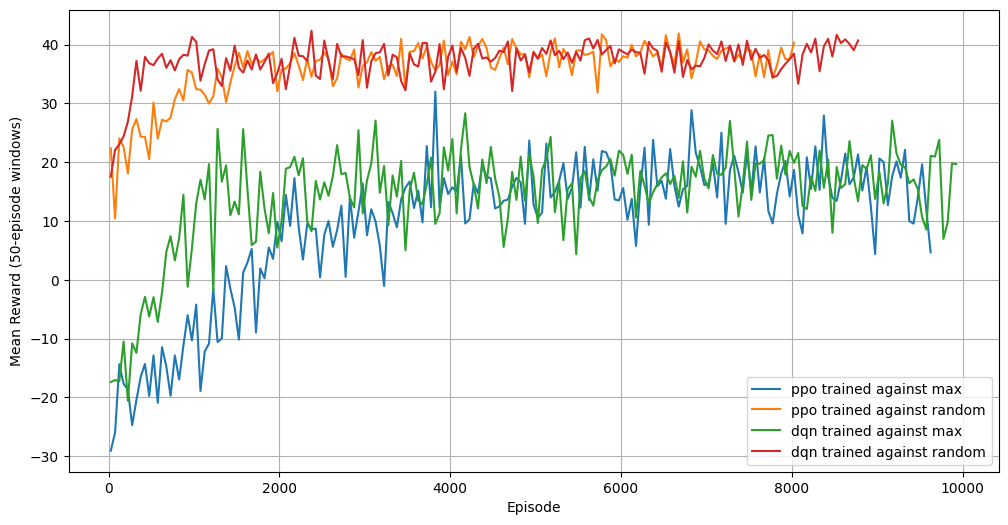

In [2]:
# Merged plot showing both model types together
print("Reward Over Time Comparison - All Models")
plt.figure(figsize=(12, 6))

for model_type, models in train_data.items():
    for model_name, data in models.items():
        monitor_data = data["monitor_data"]
        if not monitor_data.empty:
            # Calculate mean reward over windows of 50 episodes
            window_size = 50
            rewards = monitor_data["r"].values
            windowed_rewards = []
            window_indices = []
            
            for i in range(0, len(rewards), window_size):
                window_end = min(i + window_size, len(rewards))
                window_mean = np.mean(rewards[i:window_end])
                windowed_rewards.append(window_mean)
                window_indices.append(i + window_size // 2)  # Center of window
            
            plt.plot(window_indices, windowed_rewards, label=f"{model_type} trained against {model_name}")

plt.xlabel("Episode")
plt.ylabel("Mean Reward (50-episode windows)")
plt.legend()
plt.grid()
plt.show()

Reward Over Time Comparison - All Models (Square Format)


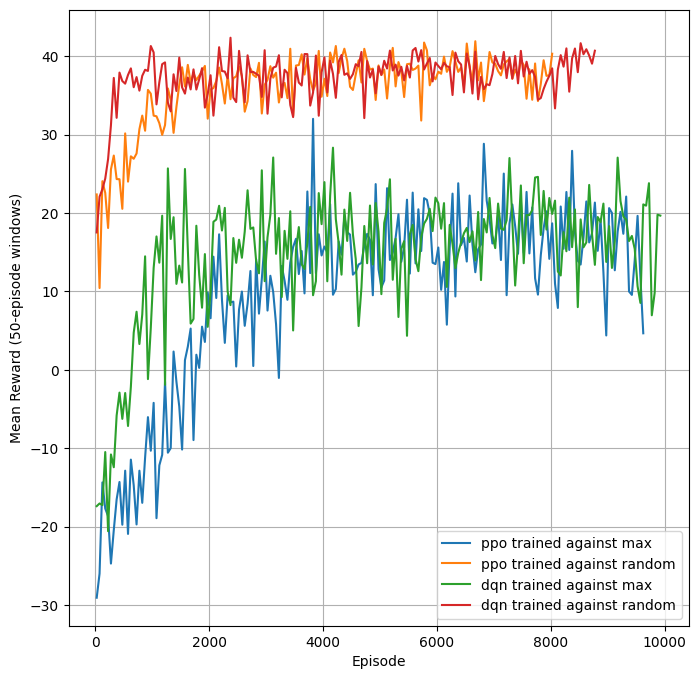

In [3]:
# Square ratio plot for paper (2-column format)
print("Reward Over Time Comparison - All Models (Square Format)")
plt.figure(figsize=(8, 8))

for model_type, models in train_data.items():
    for model_name, data in models.items():
        monitor_data = data["monitor_data"]
        if not monitor_data.empty:
            # Calculate mean reward over windows of 50 episodes
            window_size = 50
            rewards = monitor_data["r"].values
            windowed_rewards = []
            window_indices = []
            
            for i in range(0, len(rewards), window_size):
                window_end = min(i + window_size, len(rewards))
                window_mean = np.mean(rewards[i:window_end])
                windowed_rewards.append(window_mean)
                window_indices.append(i + window_size // 2)  # Center of window
            
            plt.plot(window_indices, windowed_rewards, label=f"{model_type} trained against {model_name}")

plt.xlabel("Episode")
plt.ylabel("Mean Reward (50-episode windows)")
plt.legend()
plt.grid()
plt.show()

Training Time and Episode Length Comparison


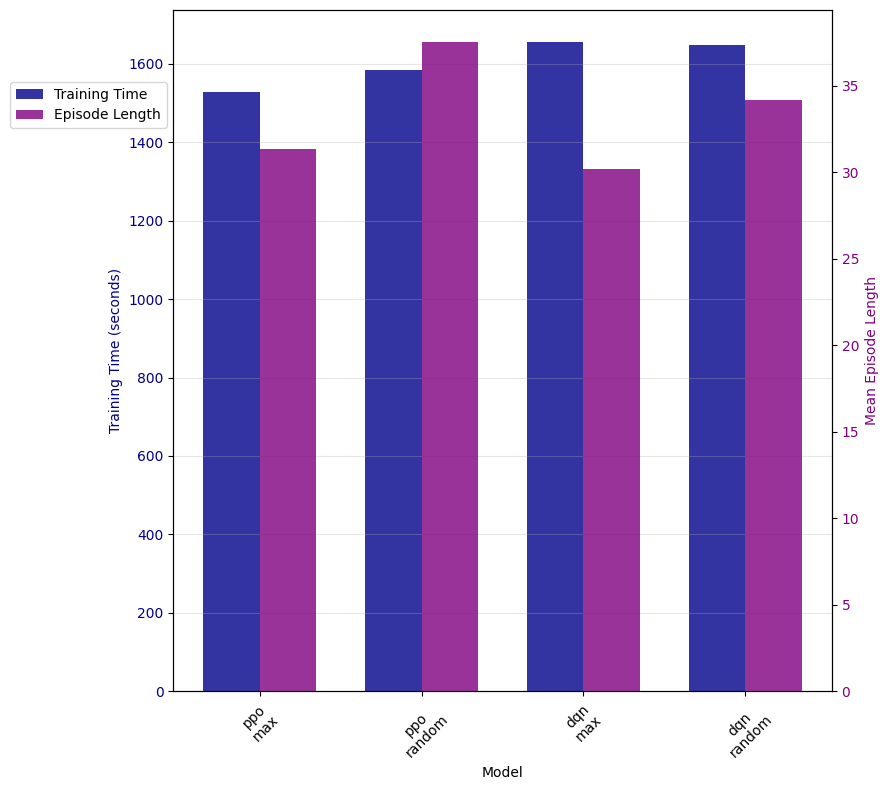

In [4]:
# Merged bar plot with dual y-axes comparing training time and episode length
print("Training Time and Episode Length Comparison")

# Collect data for plotting
model_labels = []
training_times = []
episode_lengths = []

for model_type, models in train_data.items():
    for model_name, data in models.items():
        monitor_data = data["monitor_data"]
        if not monitor_data.empty:
            # Get training time (last row time value)
            training_time = monitor_data["t"].iloc[-1]
            # Get mean episode length
            mean_episode_length = monitor_data["l"].mean()
            
            model_labels.append(f"{model_type}\n{model_name}")
            training_times.append(training_time)
            episode_lengths.append(mean_episode_length)

# Create figure with 1:1 ratio
fig, ax1 = plt.subplots(figsize=(8, 8))

# Set up x positions for bars
x = np.arange(len(model_labels))
width = 0.35

# Plot training time bars (left y-axis) with darker blue
color1 = 'darkblue'
ax1.set_xlabel('Model')
ax1.set_ylabel('Training Time (seconds)', color=color1)
bars1 = ax1.bar(x - width/2, training_times, width, label='Training Time', color=color1, alpha=0.8)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Create second y-axis for episode length with darker orange
ax2 = ax1.twinx()
color2 = 'purple'
ax2.set_ylabel('Mean Episode Length', color=color2)
bars2 = ax2.bar(x + width/2, episode_lengths, width, label='Episode Length', color=color2, alpha=0.8)
ax2.tick_params(axis='y', labelcolor=color2)

# Set x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(model_labels)

# Add legend inside the plot area
fig.legend([bars1, bars2], ['Training Time', 'Episode Length'], bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

## Resultados de evaluación

In [5]:
# Cargar datos
eval_dir = Path().parent / "outputs" / "evaluate"
eval_data = {}
if eval_dir.exists():
    for model_dir in eval_dir.iterdir():
        if model_dir.is_dir():
            # Cargar tipo de modelo
            model_type = model_dir.name
            eval_data[model_type] = {}
            # Iterar sobre los archivos *_monitor.csv
            for eval_file in model_dir.glob("*_evaluation_results.csv"):
                model_name = eval_file.stem.replace("_evaluation_results", "")
                eval_data[model_type][model_name] = {
                    "battles_data": pd.read_csv(eval_file)
                }

# Mostrar tablas individuales
for model_type, models in eval_data.items():
    print(f"Evaluation Results - {model_type}")
    for model_name, data in models.items():
        battles_data = data["battles_data"]
        if not battles_data.empty:
            print(f"\nModel: {model_name}")
            display(battles_data)
        else:
            print(f"No evaluation data available for {model_name} in {model_type}.")

Evaluation Results - ppo

Model: random


,Metric,Random,MaxBasePower,DQN (Random Train),DQN (Max Train)
0,Total Battles,1000,1000,1000,1000
1,Battles Won,957,691,639,664
2,Win Rate (%),95.7%,69.1%,63.9%,66.4%
3,Loss Rate (%),4.3%,30.9%,36.1%,33.6%
4,Mean Reward,37.24,14.39,10.58,12.47
5,Std Reward,15.37,32.97,34.51,34.03



Model: max


,Metric,Random,MaxBasePower,DQN (Random Train),DQN (Max Train)
0,Total Battles,1000,1000,1000,1000
1,Battles Won,966,720,639,666
2,Win Rate (%),96.6%,72.0%,63.9%,66.6%
3,Loss Rate (%),3.4%,28.0%,36.1%,33.4%
4,Mean Reward,37.71,16.41,10.19,12.50
5,Std Reward,13.75,31.93,34.29,33.92


Evaluation Results - dqn

Model: random


,Metric,Random,MaxBasePower
0,Total Battles,1000,1000
1,Battles Won,960,747
2,Win Rate (%),96.0%,74.7%
3,Loss Rate (%),4.0%,25.3%
4,Mean Reward,37.53,18.55
5,Std Reward,14.87,31.21



Model: max


,Metric,Random,MaxBasePower
0,Total Battles,1000,1000
1,Battles Won,964,722
2,Win Rate (%),96.4%,72.2%
3,Loss Rate (%),3.6%,27.8%
4,Mean Reward,37.79,16.89
5,Std Reward,14.22,32.16


In [6]:
# Crear matriz de win rate entre todos los modelos
print("Win Rate Matrix (%)")

# Mapeo de nombres de modelos evaluadores
model_name_mapping = {
    "dqn_max": "DQN (Max Train)",
    "dqn_random": "DQN (Random Train)",
    "ppo_max": "PPO (Max Train)",
    "ppo_random": "PPO (Random Train)"
}

# Obtener todos los modelos únicos (evaluadores y oponentes)
all_models = set()

# Agregar modelos evaluadores con nombres mapeados
for model_type, models in eval_data.items():
    for model_name in models.keys():
        evaluator_key = f"{model_type}_{model_name}"
        mapped_name = model_name_mapping.get(evaluator_key, evaluator_key)
        all_models.add(mapped_name)

# Agregar modelos oponentes de las columnas
for model_type, models in eval_data.items():
    for model_name, data in models.items():
        battles_data = data["battles_data"]
        if not battles_data.empty:
            # Obtener nombres de columnas (excluyendo 'Metric')
            opponent_columns = [col for col in battles_data.columns if col != 'Metric']
            all_models.update(opponent_columns)

all_models = sorted(list(all_models))

# Crear matriz de win rate
win_rate_matrix = pd.DataFrame(index=all_models, columns=all_models)

# Llenar la matriz con los datos de win rate
for model_type, models in eval_data.items():
    for model_name, data in models.items():
        battles_data = data["battles_data"]
        if not battles_data.empty:
            evaluator_key = f"{model_type}_{model_name}"
            row_model = model_name_mapping.get(evaluator_key, evaluator_key)
            
            # Encontrar la fila de Win Rate (%)
            win_rate_row = battles_data[battles_data['Metric'] == 'Win Rate (%)']
            
            if not win_rate_row.empty:
                # Iterar sobre las columnas de oponentes
                for opponent_col in battles_data.columns:
                    if opponent_col != 'Metric':
                        win_rate_str = win_rate_row[opponent_col].iloc[0]
                        # Remover el símbolo % y convertir a float
                        win_rate_value = float(win_rate_str.replace('%', ''))
                        
                        # Usar el nombre original del oponente
                        if opponent_col in all_models:
                            win_rate_matrix.loc[row_model, opponent_col] = round(win_rate_value, 1)
                            # Agregar el valor simétrico (100 - win_rate)
                            if opponent_col in win_rate_matrix.index:
                                win_rate_matrix.loc[opponent_col, row_model] = round(100.0 - win_rate_value, 1)

# Rellenar diagonal con "-" (un modelo contra sí mismo)
for model in all_models:
    if model in win_rate_matrix.index:
        win_rate_matrix.loc[model, model] = "-"

# Mostrar con estilo centrado
styled_matrix = win_rate_matrix.style.set_table_styles([
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'th', 'props': [('text-align', 'center')]}
])

display(styled_matrix)

Win Rate Matrix (%)


,DQN (Max Train),DQN (Random Train),MaxBasePower,PPO (Max Train),PPO (Random Train),Random
DQN (Max Train),-,nan,72.200000,33.400000,33.600000,96.400000
DQN (Random Train),nan,-,74.700000,36.100000,36.100000,96.000000
MaxBasePower,27.800000,25.300000,-,28.000000,30.900000,nan
PPO (Max Train),66.600000,63.900000,72.000000,-,nan,96.600000
PPO (Random Train),66.400000,63.900000,69.100000,nan,-,95.700000
Random,3.600000,4.000000,nan,3.400000,4.300000,-


In [7]:
# Tabla simplificada de win rates contra modelos baseline
print("Win Rates Against Baseline Models (%)")

# Mapeo de nombres de modelos evaluadores
model_name_mapping = {
    "dqn_max": "DQN (Max Train)",
    "dqn_random": "DQN (Random Train)",
    "ppo_max": "PPO (Max Train)",
    "ppo_random": "PPO (Random Train)"
}

# Crear tabla simplificada
baseline_columns = ["Random", "MaxBasePower"]
baseline_results = []

for model_type, models in eval_data.items():
    for model_name, data in models.items():
        battles_data = data["battles_data"]
        if not battles_data.empty:
            evaluator_key = f"{model_type}_{model_name}"
            mapped_name = model_name_mapping.get(evaluator_key, evaluator_key)
            
            # Encontrar la fila de Win Rate (%)
            win_rate_row = battles_data[battles_data['Metric'] == 'Win Rate (%)']
            
            if not win_rate_row.empty:
                row_data = {"Model": mapped_name}
                
                # Extraer win rates para cada baseline y formatear como "XX.X%"
                for baseline in baseline_columns:
                    if baseline in battles_data.columns:
                        win_rate_str = win_rate_row[baseline].iloc[0]
                        win_rate_value = float(win_rate_str.replace('%', ''))
                        row_data[baseline] = f"{round(win_rate_value, 1)}%"
                    else:
                        row_data[baseline] = "N/A"
                
                baseline_results.append(row_data)

# Agregar resultados hardcodeados para modelos baseline
baseline_results.append({
    "Model": "Random",
    "Random": "-",
    "MaxBasePower": "9.2%"
})

baseline_results.append({
    "Model": "MaxBasePower",
    "Random": "90.8%",
    "MaxBasePower": "-"
})

# Convertir a DataFrame
baseline_df = pd.DataFrame(baseline_results)

# Mostrar con estilo centrado
styled_baseline = baseline_df.style.set_table_styles([
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'th', 'props': [('text-align', 'center')]}
])

display(styled_baseline)

Win Rates Against Baseline Models (%)


,Model,Random,MaxBasePower
0,PPO (Random Train),95.7%,69.1%
1,PPO (Max Train),96.6%,72.0%
2,DQN (Random Train),96.0%,74.7%
3,DQN (Max Train),96.4%,72.2%
4,Random,-,9.2%
5,MaxBasePower,90.8%,-


In [8]:
# Generar tabla en formato LaTeX
print("Baseline Results Table - LaTeX Format:")
print("=" * 50)

latex_table = baseline_df.to_latex(index=False, 
                                   column_format='l|c|c',
                                   escape=False)

print(latex_table)

Baseline Results Table - LaTeX Format:
\begin{tabular}{l|c|c}
\toprule
Model & Random & MaxBasePower \\
\midrule
PPO (Random Train) & 95.7% & 69.1% \\
PPO (Max Train) & 96.6% & 72.0% \\
DQN (Random Train) & 96.0% & 74.7% \\
DQN (Max Train) & 96.4% & 72.2% \\
Random & - & 9.2% \\
MaxBasePower & 90.8% & - \\
\bottomrule
\end{tabular}

